In [29]:
import sys 
sys.path.append('..')
from utils.utils import Matrix, Vec
import numpy as np
from heapq import heappop, heappush
from collections import defaultdict

# Input

In [30]:
with open('input.txt') as file:
    maze = Matrix.from_str(file.read())

# Part 1

In [31]:
end_pos = Vec(*list(zip(*np.where(maze == 'E')))[0])
start_pos = Vec(*list(zip(*np.where(maze == 'S')))[0])
start_dir = Vec(1, 0)

In [32]:
queue = []
distances = defaultdict(lambda: np.inf)
distances[(start_pos, start_dir)] = 0
visited = set()
preds = defaultdict(set)
heappush(queue, (0, (start_pos, start_dir)))

In [33]:
while queue:
    # investigate current position-direction combination
    cur_dist, pos_dir_tuple = heappop(queue)
    cur_pos, cur_dir = pos_dir_tuple
    visited.add((cur_pos, cur_dir))
    # move forward
    next_pos = cur_pos + cur_dir
    if maze[next_pos] != '#':
        # distance from start to next pos
        next_dist = cur_dist + 1
        # Part 2: add predecessor if qual good or better distance
        if next_dist <= distances[(next_pos, cur_dir)]:
            preds[next_pos].add(cur_pos)
        # set new best distance if smaller dist
        if next_dist < distances[(next_pos, cur_dir)]:
            distances[(next_pos, cur_dir)] = next_dist
            heappush(queue, (next_dist, (next_pos, cur_dir)))
    next_dist = cur_dist + 1000
    # rotate L
    next_dir = cur_dir << 1
    if next_dist < distances[(cur_pos, next_dir)]:
        distances[(cur_pos, next_dir)] = next_dist
        heappush(queue, (next_dist, (cur_pos, next_dir)))
    # rotate L
    next_dir = cur_dir >> 1
    if next_dist < distances[(cur_pos, next_dir)]:
        distances[(cur_pos, next_dir)] = next_dist
        heappush(queue, (next_dist, (cur_pos, next_dir)))    


In [34]:
# get direction leading to min dist at end pos
directions = [Vec(0, 1) >> k for k in range(4)]
min([distances[(end_pos, dir)] for dir in directions])

127520

# Part 2

In [35]:
def get_turns_to_equal(v1, v2):
    """return how many 90 deg turns needed to equal vecs. Also 0 if not possible"""
    for k in range(4):
        if v1 >> k == v2:
            return 2-abs(k-2)
    return 0

In [36]:
# traverse from end to start
queue = [(end_pos, Vec(0,0))]
visited = set()
while queue:
    # goal dir is the dir best to goal
    cur_pos, goal_dir = queue.pop() 
    if cur_pos not in visited:
        # get min dist of all possible predecessors
        set_of_preds = preds[cur_pos]
        min_dist_of_preds = np.inf
        min_dist_preds = set()
        for pred_pos in list(set_of_preds):
            pred_dir = cur_pos - pred_pos
            turns_needed = get_turns_to_equal(goal_dir, pred_dir)
            pred_dist = distances[(pred_pos, pred_dir)] + turns_needed * 1000 + 1
            # if same dist add me to predecessors with minimal dist
            if pred_dist == min_dist_of_preds:
                min_dist_preds.add((pred_pos, pred_dir))
            # if less dist clear list and add me
            if pred_dist < min_dist_of_preds:
                min_dist_of_preds = pred_dist
                min_dist_preds = set([(pred_pos, pred_dir)])
        queue.extend(min_dist_preds)
        visited.add(cur_pos)
len(visited)

565

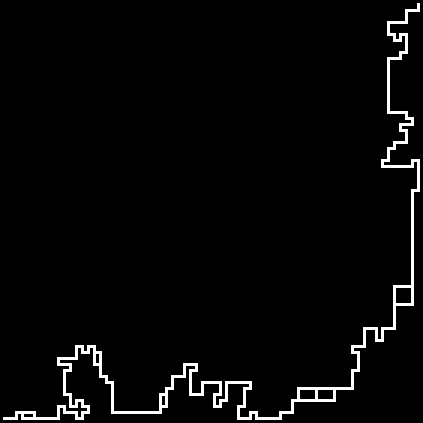

In [37]:
from PIL import Image
m = Matrix(np.full(maze.shape, 0))
for pos in visited:
    m[pos] = 255
m = np.kron(m, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
Image.fromarray(m.T.astype(np.uint8), mode='L')